**Vision Based** **Grading** **For Dairy Products (Milk Grader)**

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
# This is for the fonts
from matplotlib import pyplot as plt, font_manager as fm

Data Preparation and Cleaning

In [2]:
milkData = pd.read_csv('milknew.csv')

In [3]:
milkData.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
print(milkData.shape)

(1059, 8)


In [5]:
milkData.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [6]:
milkData.dropna()
milkData.shape

(1059, 8)

Checking for duplicates

In [7]:
milkData.duplicated().sum()

np.int64(976)

In [8]:
milkData.loc[milkData.duplicated(),:]

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
35,6.8,45,0,1,1,1,255,high
48,9.5,34,1,1,0,1,255,low
50,6.6,37,1,1,1,1,255,high
51,5.5,45,1,0,1,1,250,low
52,4.5,60,0,1,1,1,250,low
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


Random Forest Classifier

In [9]:
# Check missing values in data
milkData.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

Cross Validation

In [10]:
# Listing out unique values in the dataset
milkData.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [11]:
milkData

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


In [12]:
# Convert the dictionary into DataFrame
milkData1= pd.DataFrame(milkData)

# Remove column name 'A'
milkData2=milkData.drop(['Grade'], axis=1)
milkData2

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247
1055,6.7,38,1,0,1,0,255
1056,3.0,40,1,1,1,1,255
1057,6.8,43,1,0,1,0,250


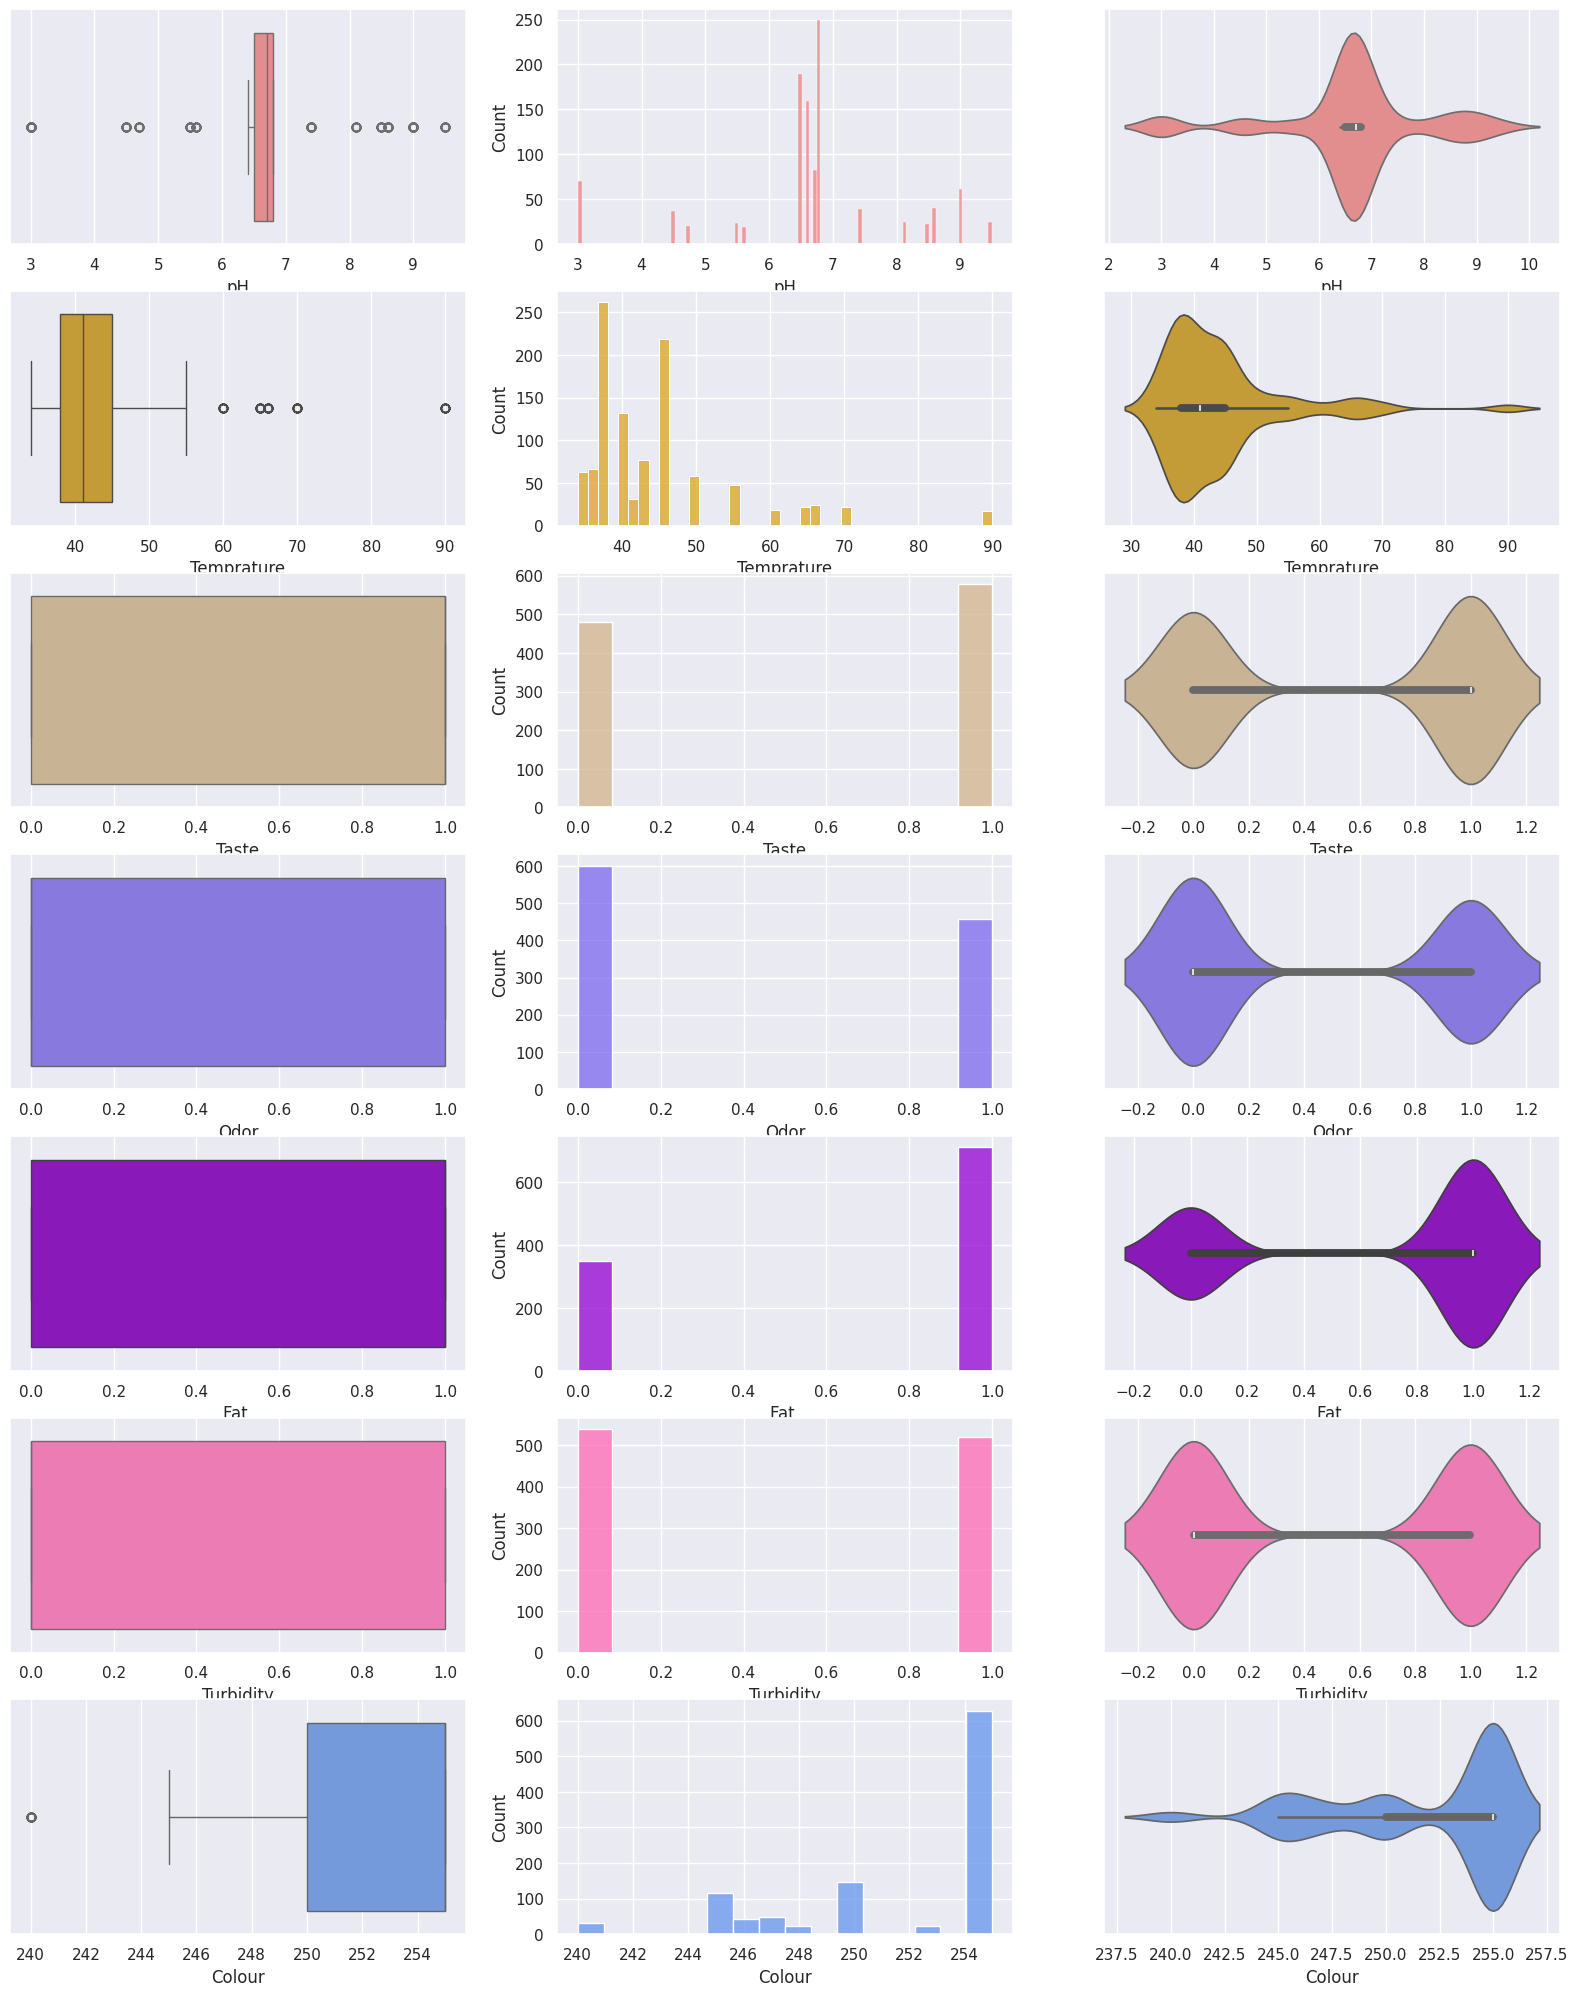

In [13]:
# Draw the distributions of all variables in boxplots, histograms, and violin plots.
f, axes = plt.subplots(7, 3, figsize=(20, 25))
colors = ["lightcoral", "goldenrod", "tan", "mediumslateblue", "darkviolet", "hotpink", "cornflowerblue", "dodgerblue", "royalblue", "mediumaquamarine", "teal", "firebrick"]

count = 0
for var in milkData2:
    sb.boxplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.histplot(data=milkData2[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(data=milkData2[var], orient = "h", color = colors[count], ax = axes[count,2])
    count += 1

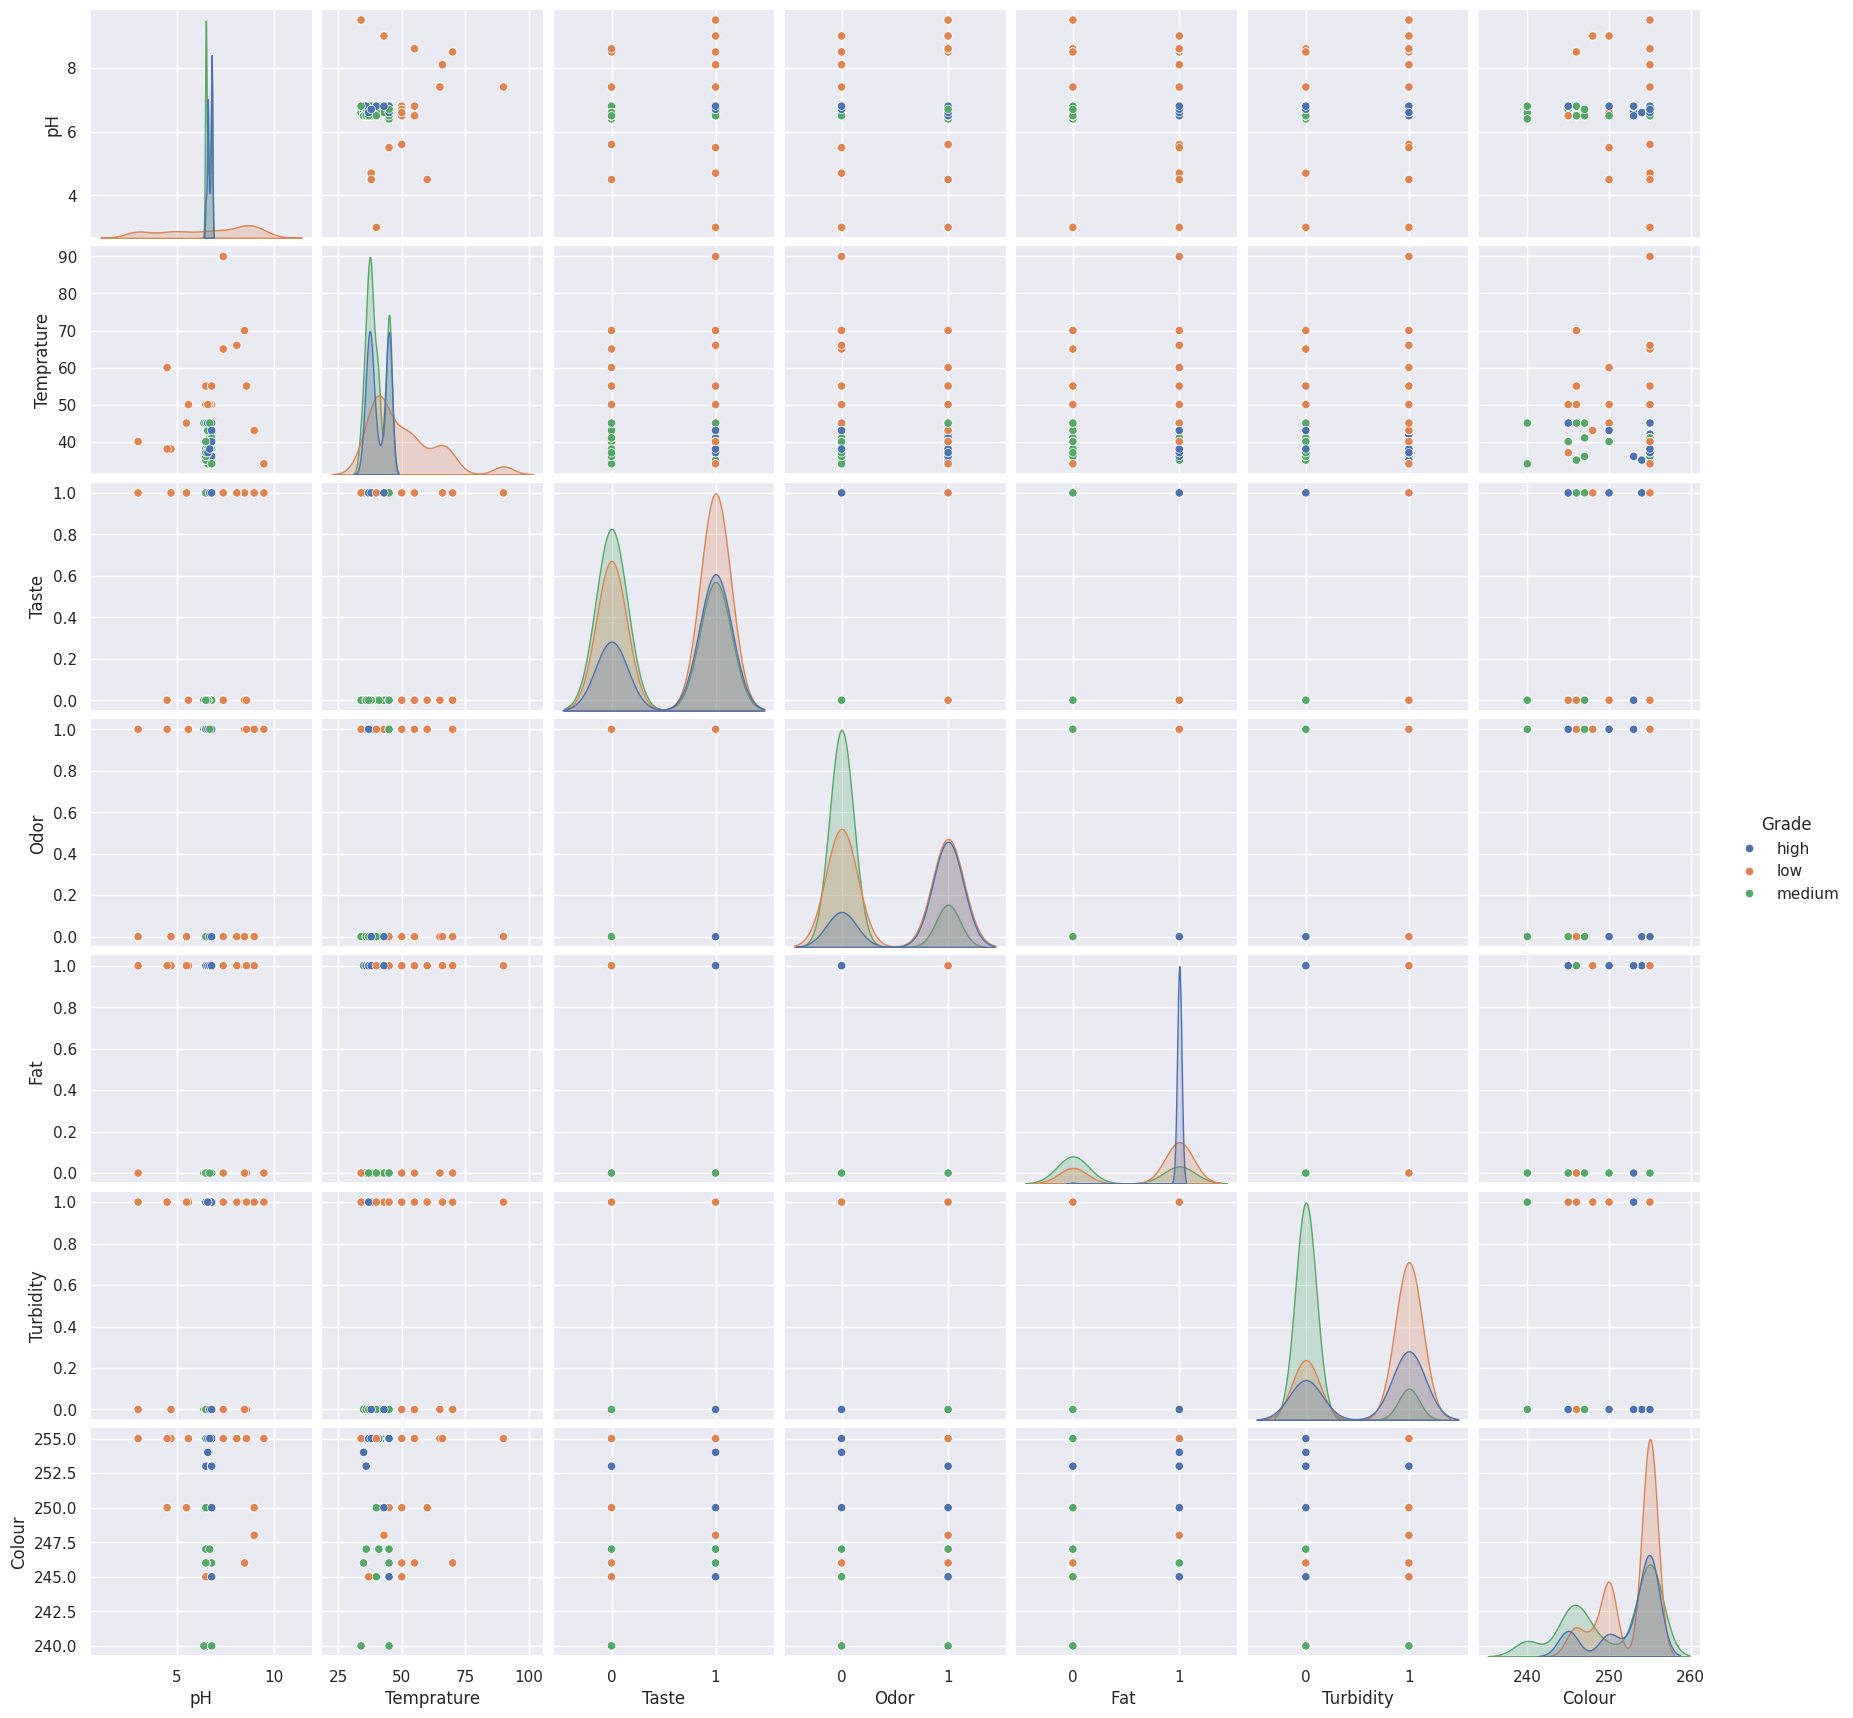

In [14]:
sb.pairplot(milkData,vars=milkData.columns[:-1],hue='Grade')

Density Plot

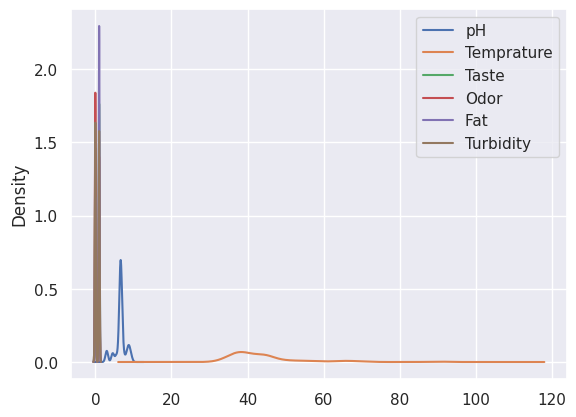

In [15]:
cols = milkData.columns[:6]
densityplot = milkData[cols].plot(kind='density')

The lowest , highest and mean of temperature, PH and colour

In [16]:
#min, max , average for temperature
print('The lowest temperature in the Milk is '+ str(milkData['Temprature'].min()))
print('The highest temperature in the Milk is '+ str(milkData['Temprature'].max()))
print('The average temperature in the Milk is '+ str(round(milkData['Temprature'].mean(),3)))
#min, max, average for PH
print('The lowest pH in the Milk is '+ str(milkData['pH'].min()))
print('The highest pH in the Milk is '+ str(milkData['pH'].max()))
print('The average pH in the Milk is '+ str(round(milkData['pH'].mean(),3)))
#min,max,averagr for colour
print('The lowest Colour in the Milk is '+ str(milkData['Colour'].min()))
print('The highest Colour in the Milk is '+ str(milkData['Colour'].max()))
print('The average Colour in the Milk is '+ str(round(milkData['Colour'].mean(),3)))

The lowest temperature in the Milk is 34
The highest temperature in the Milk is 90
The average temperature in the Milk is 44.227
The lowest pH in the Milk is 3.0
The highest pH in the Milk is 9.5
The average pH in the Milk is 6.63
The lowest Colour in the Milk is 240
The highest Colour in the Milk is 255
The average Colour in the Milk is 251.84


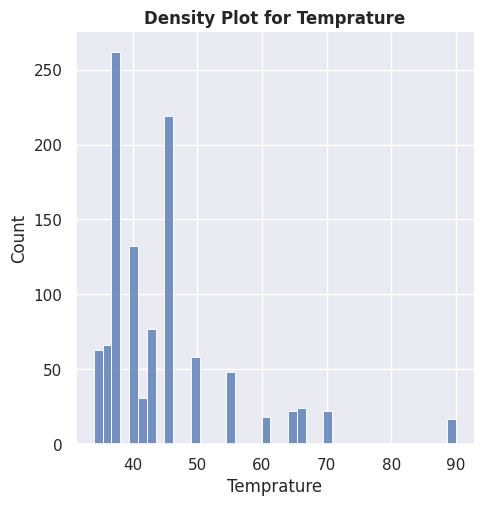

In [17]:
sb.displot(milkData['Temprature'], color = 'b')
plt.title("Density Plot for Temprature",size=12 ,fontweight="bold" )
plt.show()

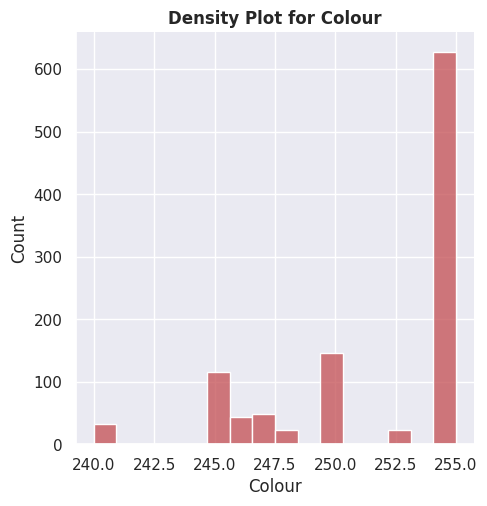

In [18]:
sb.displot(milkData['Colour'], color = 'r')
plt.title("Density Plot for Colour", size=12 ,fontweight="bold" )
plt.show()

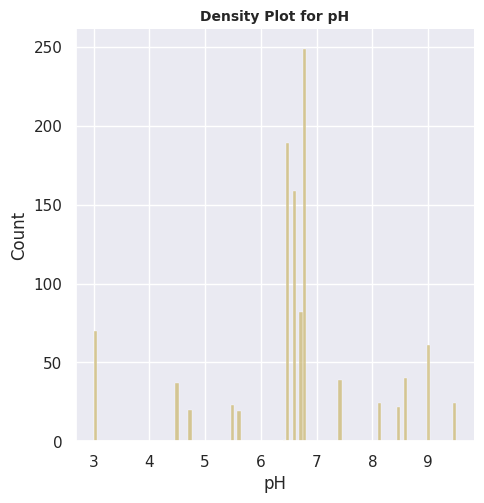

In [19]:
sb.displot(milkData['pH'], color = 'y')
plt.title("Density Plot for pH", size=10 ,fontweight="bold" )
plt.show()

Extracting the Grade variable

In [20]:
milkData.Grade.value_counts()

Grade
low       429
medium    374
high      256
Name: count, dtype: int64

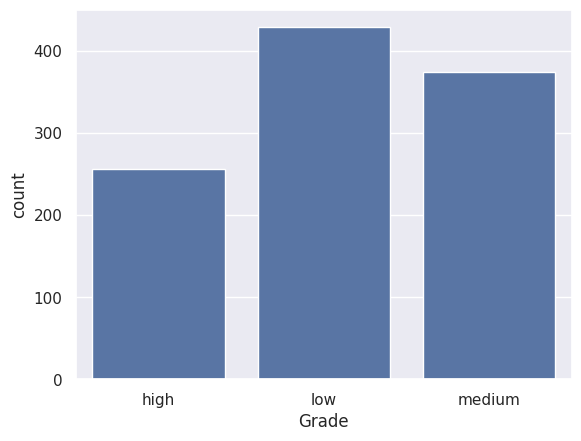

In [21]:
sb.countplot(x='Grade', data=milkData)
plt.show()

Correlation HeatMap

                  pH  Temprature     Taste      Odor      Fat   Turbidity  \
pH          1.000000    0.244684 -0.064053 -0.081331 -0.093429   0.048384   
Temprature  0.244684    1.000000 -0.109792 -0.048870  0.024073   0.185106   
Taste      -0.064053   -0.109792  1.000000  0.017582  0.324149   0.055755   
Odor       -0.081331   -0.048870  0.017582  1.000000  0.314505   0.457935   
Fat        -0.093429    0.024073  0.324149  0.314505  1.000000   0.329264   
Turbidity   0.048384    0.185106  0.055755  0.457935  0.329264   1.000000   
Colour     -0.164565   -0.008511 -0.082654 -0.039361  0.114151   0.136436   

              Colour  
pH         -0.164565  
Temprature -0.008511  
Taste      -0.082654  
Odor       -0.039361  
Fat         0.114151  
Turbidity   0.136436  
Colour      1.000000  


<Axes: >

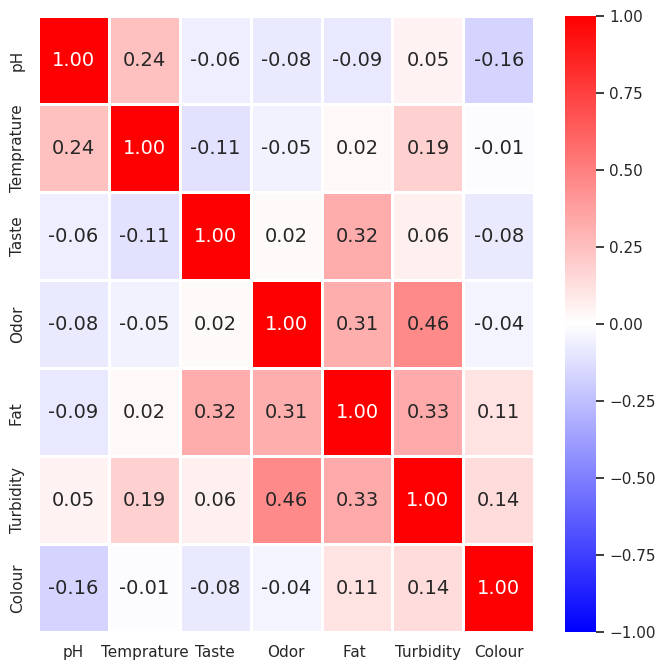

In [22]:
# Correlation Matrix Values
# Select only numerical columns
numerical_milkData = milkData.select_dtypes(include=np.number)
print(numerical_milkData.corr())

# Heatmap of the Correlation Matrix
f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.heatmap(numerical_milkData.corr(), vmin = -1, vmax = 1,  linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 14}, cmap = "bwr")

1. What is the relationship between Odor and Turbidity

In [23]:
pd.DataFrame(milkData.groupby("Odor")["Turbidity"].mean())

,Turbidity
Odor,
0,0.291181
1,0.753275


2. What is the relationship between Fat and Taste of milk?

In [24]:
pd.DataFrame(milkData.groupby('Fat ')['Taste'].mean())

,Taste
Fat,
0,0.316092
1,0.659634


3. What is the relationship between pH and Temperature?

In [25]:
pd.DataFrame(milkData.groupby('pH')['Temprature'].mean())

,Temprature
pH,
3.0,40.000000
4.5,48.702703
4.7,38.000000
5.5,45.000000
5.6,50.000000
6.4,45.000000
6.5,37.746032
6.6,41.125786
6.7,42.951220


Feature Engineering

In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
milkData['Grade']= label_encoder.fit_transform(milkData['Grade'])

In [27]:
milkData.head()
# The Grade of milk has hence transformed into numerical variables

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


Now we will proceed to build a machine learning model

In [28]:
#These are the libraries needed

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [29]:
#splinting into train and test
x= milkData.drop(['Grade'],axis=1)
y= milkData['Grade']
# Splitting out dataset into train and test set with test size 30% of entire dataset
# Standardization of data

from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(x)

# Generating the standardized values of X and y
x=PredictorScalerFit.transform(x)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [30]:
print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (741, 7)
X Test  :  (318, 7)
Y Train :  (741,)
Y Test  :  (318,)


Gaussian Naive Bayes

In [31]:
#This is for the test dataset
model=GaussianNB()
model.fit(X_train,y_train)
X_test_predict_gnb =model.predict(X_test)
print('The accuracy of the Gaussian Naive Bayes model (Test Dataset) is',metrics.accuracy_score(X_test_predict_gnb,y_test))
#This is for the train dataset
model=GaussianNB()
model.fit(X_test,y_test)
X_train_predict_gnb =model.predict(X_train)
print('The accuracy of the Gaussian Naive Bayes model (Train Dataset) is',metrics.accuracy_score(X_train_predict_gnb,y_train))

The accuracy of the Gaussian Naive Bayes model (Test Dataset) is 0.9025157232704403
The accuracy of the Gaussian Naive Bayes model (Train Dataset) is 0.8272604588394062


Logistic Regression

In [32]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a logistic regression model on the scaled data
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [33]:
#This is for the test dataset
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
X_test_predict_lr =model.predict(X_test)
print('The accuracy for Logistic Regression model is (Test Dataset) ', metrics.accuracy_score(X_test_predict_lr,y_test))
#This is for the train dataset
model = LogisticRegression()
model.fit(X_test_scaled,y_test)
X_train_predict_lr =model.predict(X_train)
print('The accuracy for Logistic Regression model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_lr,y_train))

The accuracy for Logistic Regression model is (Test Dataset)  0.8522012578616353
The accuracy for Logistic Regression model is (Train Dataset)  0.8259109311740891


Random Forest Classification

In [34]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)
X_test_predict_rfc =model.predict(X_test)
print('The accuracy of the Random Forests model is (Test Dataset', metrics.accuracy_score(X_test_predict_rfc,y_test))

#This is for the train dataset
model = RandomForestClassifier(n_estimators=100)
model.fit(X_test,y_test)
X_train_predict_rfc =model.predict(X_train)
print('The accuracy of the Random Forests model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_rfc,y_train))

The accuracy of the Random Forests model is (Test Dataset 0.9968553459119497
The accuracy of the Random Forests model is (Train Dataset)  0.9986504723346828


Visualisation of Decision Tree

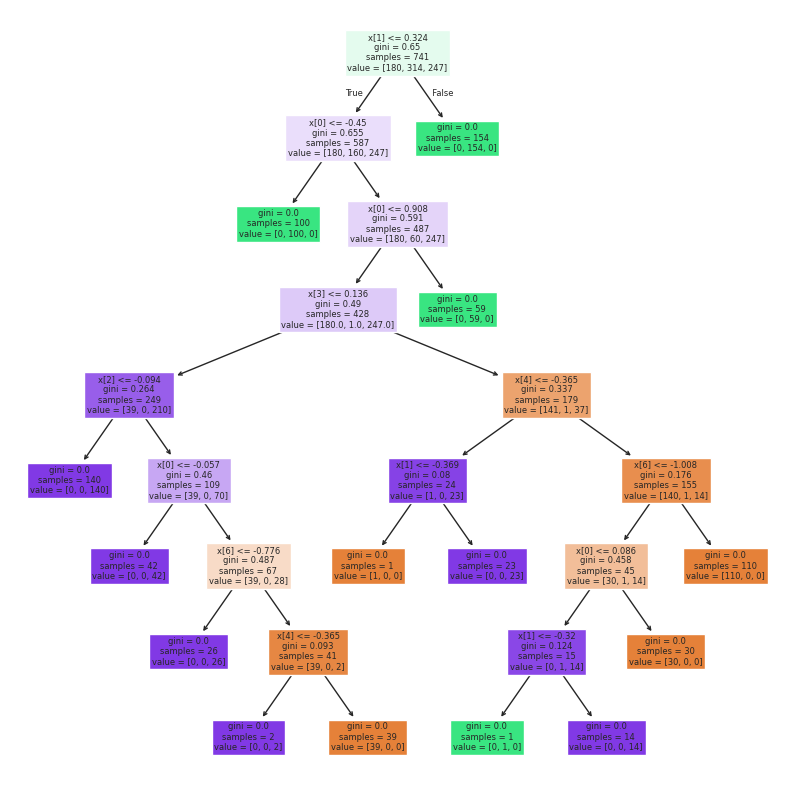

In [35]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(10, 10))
tree.plot_tree(clf, filled=True)
plt.show()

Decision Tree Classifier

In [36]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
X_test_predict_dtc = model.predict(X_test)
print('The accuracy for Decision Tree Classifier model is (Test Dataset) ', metrics.accuracy_score(X_test_predict_dtc,y_test))

#This is for the train dataset
model = RandomForestClassifier(n_estimators=100)
model.fit(X_test,y_test)
X_train_predict_dtc =model.predict(X_train)
print('The accuracy for Decision Tree Classifier model is  (Train Dataset) ',metrics.accuracy_score(X_train_predict_dtc,y_train))

The accuracy for Decision Tree Classifier model is (Test Dataset)  0.9937106918238994
The accuracy for Decision Tree Classifier model is  (Train Dataset)  0.9986504723346828


KNeighbors Classifier

In [37]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
X_test_predict_knn = model.predict(X_test)
print('The accuracy for KNN classifier model is (Test Dataset)', metrics.accuracy_score(X_test_predict_knn,y_test))

#This is for the train dataset
model = KNeighborsClassifier()
model.fit(X_test,y_test)
X_train_predict_knn =model.predict(X_train)
print('The accuracy for KNN classifier model is (Train Dataset) ',metrics.accuracy_score(X_train_predict_knn,y_train))

The accuracy for KNN classifier model is (Test Dataset) 0.9937106918238994
The accuracy for KNN classifier model is (Train Dataset)  0.9568151147098516


In [38]:
test_acc=[]
train_acc=[]

for i in range(1,15):
  knn = KNeighborsClassifier(i) #setting up a knn classifier
  knn.fit(X_train,y_train) #fitting the model
  # computing the accuracy for both the trainig and the test data
  train_acc.append(knn.score(X_train,y_train))
  test_acc.append(knn.score(X_test,y_test))

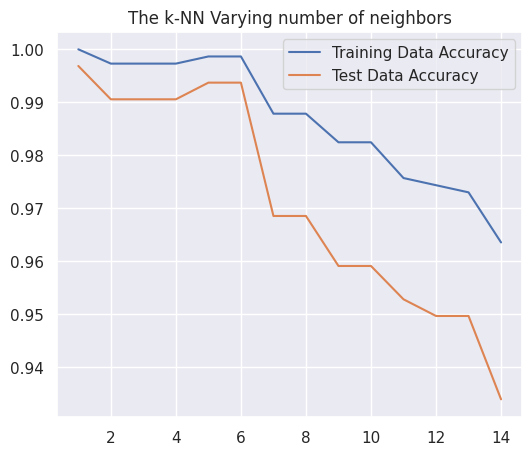

In [39]:
plt.figure(figsize=(6,5))
plt.title('The k-NN Varying number of neighbors')
sb.lineplot(x=range(1,15), y=train_acc, label='Training Data Accuracy')
sb.lineplot(x=range(1,15), y=test_acc, label='Test Data Accuracy')
plt.show()

Accuracy Comparision

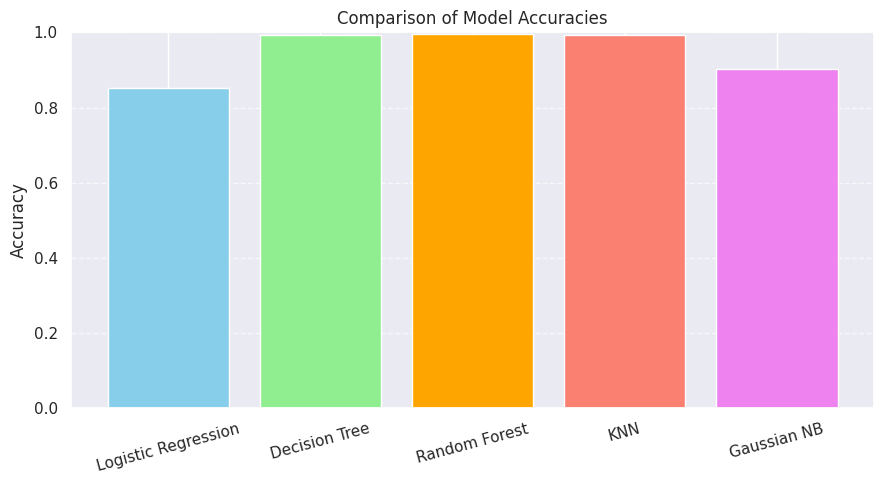

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Accuracy scores from your model evaluations
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, X_test_predict_lr),
    'Decision Tree': accuracy_score(y_test, X_test_predict_dtc),
    'Random Forest': accuracy_score(y_test, X_test_predict_rfc),
    'KNN': accuracy_score(y_test, X_test_predict_knn),
    'Gaussian NB': accuracy_score(y_test, X_test_predict_gnb)
}

# Plotting
plt.figure(figsize=(9, 5))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['skyblue', 'lightgreen', 'orange', 'salmon', 'violet'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the figure
plt.tight_layout()
plt.savefig('fig4_model_accuracy.png', dpi=300)
plt.show()


Performance Comparison of Machine Learning Models for Milk Quality Prediction

In [41]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models and their predictions
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'Gaussian NB']
predictions = [X_test_predict_lr, X_test_predict_dtc, X_test_predict_rfc, X_test_predict_knn, X_test_predict_gnb]

# Collect performance metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

for name, pred in zip(model_names, predictions):
    metrics['Model'].append(name)
    metrics['Accuracy'].append(round(accuracy_score(y_test, pred), 3))
    metrics['Precision'].append(round(precision_score(y_test, pred, average='weighted'), 3))
    metrics['Recall'].append(round(recall_score(y_test, pred, average='weighted'), 3))
    metrics['F1-Score'].append(round(f1_score(y_test, pred, average='weighted'), 3))

# Create DataFrame
metrics_df = pd.DataFrame(metrics)

# Display the table
print(metrics_df.to_string(index=False))


              Model  Accuracy  Precision  Recall  F1-Score
Logistic Regression     0.852      0.862   0.852     0.855
      Decision Tree     0.994      0.994   0.994     0.994
      Random Forest     0.997      0.997   0.997     0.997
                KNN     0.994      0.994   0.994     0.994
        Gaussian NB     0.903      0.902   0.903     0.902
